In [4]:
# Speed benchmarks
# tf is quite slow so we have scaled the problem size down by 10x
# len(X) is number of times tf function is called, & sample size is smaller by 10x
# So the true tf speed assuming linearity is len(X) * 10 * speed

print("Numpy: " + str(elapsed1) + "s  Scipy: " + str(elapsed2) + "s  TF: " + str(len(X) * 10 * elapsed3) + "s")

Numpy: 10.05978720501298s  Scipy: 52.94583861200954s  TF: 1241.9945767469471s


```
The Binomial Distribution can be approximated by a Gaussian.
For large n with p ~ 0.5, with np > 5 & npq > 5 i.e for n >= 20, since p = q = 0.5
Bin(n,p) ~ Norm( mu = n*p, sigma = sqrt(n*p*(1-p)))

We seek to estimate the probability of exactly half the trials succeeding & half the trials failing.
Essentially, on a gaussian distribution with some (mu,sigma), we want the chances of X = n/2.

But the gaussian is a continous distribution, and we seek to estimate the probability of a discrete event.
The answer would be zero, unless we apply a so-called continuity correction.
Essentially, we could create an interval around n/2, and integrate over that interval.
[n/2-1/2,n/2 + 1/2] would give us an interval

When we find the probability of our continous random variable inhabiting that interval, 
that's about the same as the probability of our discrete rv equalling the center of the interval.
The approximation gets better as n gets larger and approx error converges to zero almost surely.

Essentially, what we seek is this probability:
prob(n = [n/2-1/2, n/2+1/2], Norm(mu = n*p, sigma = sqrt(n*p*p))

```

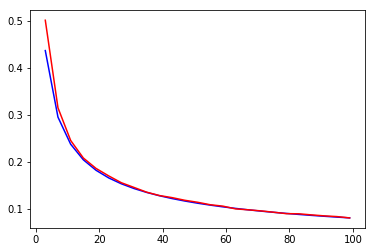

Chances of swing vote in a family of 3 kids: 0.4362971383492269
Chances of swing vote in a classroom of 31 kids: 0.14253755804075885
Chances of swing vote in a school of 301 kids: 0.04596384948361121
Chances of swing vote in a city of 1000001 voters: 0.0007978840288803135


In [5]:
# LETS DO MATH

from scipy.stats import norm
def mathChancesOfSwingVote(X):
    n = X
    p = 0.5
    mu = n*p # this is the mean of the normal approximation to the binomial
    sigma = np.sqrt(n*p*p) # stdev of the approximation
    
    top = norm.cdf(n/2 + 0.5,mu,sigma) # the probability from [-inf, n/2 + 1/2]
    bottom = norm.cdf(n/2 - 0.5,mu,sigma) # the probability from [-inf, n/2 - 1/2]
    return top - bottom # the probability from [n/2 - 1/2, n/2 + 1/2]

X = np.arange(3,101,4)
Y = list(map(mathChancesOfSwingVote, X))
Ytrue = list(map(numpyChancesOfSwingVote, X))

plt.plot(X,Y, 'b') # the blue is the approximation
plt.plot(X,Ytrue, 'r') # the red is the true value
plt.show()

# Family of 3 kids
print("Chances of swing vote in a family of 3 kids: " + str(mathChancesOfSwingVote(3)))

# Class of 31 kids
print("Chances of swing vote in a classroom of 31 kids: " + str(mathChancesOfSwingVote(31)))

# A school of 301 kids
print("Chances of swing vote in a school of 301 kids: " + str(mathChancesOfSwingVote(301)))

# A city of million voters
print("Chances of swing vote in a city of 1000001 voters: " + str(mathChancesOfSwingVote(1000001)))

```
Notes on the code:

1. In numpy, np.random.binomial(MAX,p,(N,n)) gives you (Nxn) samples, each sample is the number of SUCCESSES if MAX trials were performed with p being the probability of success in a trial.
Hence if p = 1, you simply get MAX. 
p=0 gets you 0. 
p  between 0 & 1 would give you a number between [0,MAX]
To simulate a voting scenario, np.random.binomial(1,0.5) would give you number of successes if you run 1 trial with 50% chance of winning, so returns either a 0 or a 1. To get (Nxn) samples, use np.random.binomial(1,0.5,(N,n))

2. Given an array like [0,1,0,0,1,1,] np.bincount counts the number of 0 bins & number of 1 bins.
You want to make sure both zero & 1 bins exist (len(bc) ==2), & then check the count.

3. scipy.stats.binom.rvs API is identical to np.random.binomial

4. It should be clear that instead of counting zeros & ones in an array, we can simply compute the mean of the array. If there were equal number of 0s & 1s, the mean should be 0.5

5. In tensorflow, the random uniform distribution with min of 0 & max of 2 is identical to a binomial with 1 trial & 50% chance of success. For Nxn samples, you have
tf.random_uniform((N,n), minval= 0, maxval=2, dtype=tf.int32)

6. Evaluate the tensor exactly once ( expensive!) and store results in some array that can then be indexed into. Once you have an interactive tensorflow session (sess = tf.InteractiveSession()), the eval() op on a tensor evaluates its contents.

7. Regards speed of execution, numpy >>  scipy >> tf. Numpy is way faster. tf's sample size has been scaled down 10x from 100k to 10k, to let it complete fast. 

8. All these methods are pretty dumb compared to just using the gaussian approximation to the binomial. However, programmers don't grok math, so this is where we are.
```

```
Summary: 
While it is important to have the ability to swing the vote in your party's favor,
that ability dissipates exponentially.

It isn't why voters vote.

You have a 50% ie. 1 in 2 chance of swinging the vote in your family of 3.
Your chances are down to 1 in 7 in your classroom of 31.
Your chances are further down to 1 in 25 in your school of 301.
As a voter in a small city of million citizens, your chances are 1 in 1250.

Furthermore, in a real election, if a single voter can actually swing the vote, 
the votes are scrapped & there's either a recount or a re-election!
So there's no point to computing this artificial metric.

Get out and vote!
```    